In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [2]:
df = pd.read_stata('H_DAD_w1a3.dta')
df.head()

,prim_key,hhid,pnc,pn,r1stateid,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,...,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3,r1raterid1,r1raterid2,r1raterid3
0,101000100040102,101000100040100,02,2,1,2019,1,224,1950,11.0,...,0.5,0,0.5,0.5,0,0,0.5,7049.0,7021.0,7038.0
1,101000100320109,101000100320100,09,9,1,2019,1,224,1949,9.0,...,1,0.5,0.5,0.5,0.5,0,0.5,7033.0,7038.0,7021.0
2,101000101040101,101000101040100,01,1,1,2019,1,223,1957,5.0,...,0.5,1,0.5,0,0.5,0.5,0.5,7043.0,7020.0,7049.0
3,101000101720101,101000101720100,01,1,1,2019,1,222,1957,11.0,...,2,2,3,2,3,3,3,7043.0,7038.0,7046.0
4,101000101890107,101000101890100,07,7,1,2019,1,222,1949,4.0,...,0.5,0,0,0,0.5,0,0.5,7049.0,7038.0,7020.0


In [3]:
df_blood = pd.read_stata('H_LASI_a2.dta')
df_blood.head()

,prim_key,hhid,pnc,pn,h1coupid,s1prim_key,raspid1,r1mltsps,inw1,inw1pm,...,r1lsatscm,s1lsatscm,r1lsatsc3,s1lsatsc3,r1lsatsc3m,s1lsatsc3m,r1satlife,s1satlife,r1satlifez,s1satlifez
0,101000100040101,101000100040100,01,1,1.0,101000100040102,101000100040102,1.0,1.yes,1.yes,...,0.0,0.0,2.0,1.8,0.0,0.0,1.not at all satisfied,3.somewhat satisfied,-2.833213,-0.592182
1,101000100040102,101000100040100,02,2,1.0,101000100040101,101000100040101,1.0,1.yes,1.yes,...,0.0,0.0,1.8,2.0,0.0,0.0,3.somewhat satisfied,1.not at all satisfied,-0.592182,-2.833213
2,101000100130102,101000100130100,02,2,2.0,101000100130101,101000100130101,1.0,1.yes,1.yes,...,0.0,0.0,3.0,2.6,0.0,0.0,4.very satisfied,4.very satisfied,0.528333,0.528333
3,101000100130101,101000100130100,01,1,2.0,101000100130102,101000100130102,1.0,1.yes,1.yes,...,0.0,0.0,2.6,3.0,0.0,0.0,4.very satisfied,4.very satisfied,0.528333,0.528333
4,101000100130109,101000100130100,09,9,3.0,0,,0.0,1.yes,1.yes,...,0.0,NaN,3.0,NaN,0.0,NaN,4.very satisfied,NaN,0.528333,NaN


In [4]:
# Checking if all the people from 'w1a3' are present in `w1a`
l1 = df['prim_key']
l2 = df_blood['prim_key']

list(set(l1)-set(l2))

[]

All the people from H_DAD_w1a3 are present in H_DAD_w1a

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096 entries, 0 to 4095
Columns: 729 entries, prim_key to r1raterid3
dtypes: category(143), float32(2), float64(147), int8(437)
memory usage: 9.5 MB


# Data Cleaning

## Missing Values

I have considered all of the below as missing:

> .m:Missing

> .r:Refuse

> .x:Not in phase/wave

> .n:Not Assessed 

> .s:Skipped 

> .d:DK

> .h:Not interviewed

> .c:Cannot Count

> .i:Invalid

In [6]:
# missing values
missing = df.isna().sum()
missing = missing[missing>0]

missing.head()

rabmonth       527
r1caste         21
r1obsnoise    3296
r1obsodor     3296
r1obsair      3296
dtype: int64

In [7]:
print(f'The are {(missing/df.shape[0]<=0.05).sum()} columns with less than 5% missing values')

print(f'The are {(missing/df.shape[0]>0.7).sum()} columns with more than 70% missing values')

The are 97 columns with less than 5% missing values
The are 29 columns with more than 70% missing values


We can remove the rows for less than 5% missing values and for the columns with more than 70% missing data, we have to remove the whole column or assign a category to them!?

In [8]:
# Imputing for r1readfol and r1write
df['r1readfol'].fillna('Cannot read and write', inplace=True)
df['r1write'].fillna('Cannot read and write', inplace=True)

## Correcting datatypes

As there 700+ columns, I will check data types in group of 20

In [9]:
# First 20 Columns
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096 entries, 0 to 4095
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   prim_key      4096 non-null   category
 1   hhid          4096 non-null   category
 2   pnc           4096 non-null   category
 3   pn            4096 non-null   category
 4   r1stateid     4096 non-null   int8    
 5   r1iwy_d       4096 non-null   category
 6   r1iwm_d       4096 non-null   category
 7   r1lasidy      4096 non-null   category
 8   rabyear       4096 non-null   category
 9   rabmonth      3569 non-null   category
 10  r1agey        4096 non-null   category
 11  ragender      4096 non-null   int8    
 12  r1phase       4096 non-null   int8    
 13  raeduc_l      4096 non-null   int8    
 14  raeducl       4096 non-null   int8    
 15  raedyrs       4096 non-null   category
 16  r1illiterate  4096 non-null   int8    
 17  h1rural       4096 non-null   int8    
 18  r1caste 

In [10]:
categorical_cols = ['r1stateid', 'ragender', 'r1phase', 'raeduc_l', 'raeducl', 'r1illiterate', 'h1rural', 'r1lang_d', 'r1caste']
numeric_cols = ['r1lasidy', 'r1agey', 'raedyrs']

In [11]:
# Columns 20 to 40
df.iloc[:,20:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096 entries, 0 to 4095
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   r1risk      4096 non-null   int8    
 1   r1distance  4096 non-null   int8    
 2   r1location  4096 non-null   int8    
 3   r1iwstat_d  4096 non-null   int8    
 4   r1wtresp    4096 non-null   category
 5   r1wtrespb   4096 non-null   category
 6   r1wtresp0   4096 non-null   category
 7   r1obsnoise  800 non-null    float64 
 8   r1obsodor   800 non-null    float64 
 9   r1obsair    800 non-null    float64 
 10  r1obshouse  800 non-null    float64 
 11  r1yr        4096 non-null   int8    
 12  r1fyr       4096 non-null   int8    
 13  r1season    4096 non-null   int8    
 14  r1fseason   4096 non-null   int8    
 15  r1date      4096 non-null   int8    
 16  r1fdate     4096 non-null   int8    
 17  r1dw        4096 non-null   int8    
 18  r1fdw       4096 non-null   int8    
 19  r1mo  

By doing this for every other feature I have collected list of all numeric features. Almost all of them are metioned as Type Cont in documentation, with following exceptions:
- R1IWY_D, R1IWM_D, RABYEAR, RABMONTH
- R1RATERID1, R1RATERID2, R1RATERID3

I am not sure of below features whether to count them as numeric or categorical, so we will fix them after the meeting
- R1MNA_HSTAT, R1MNA_MAC, R1MNA_CC, R1MNA_SCREEN, R1MNA_ASSESS, R1MNA_SCALE

In [12]:
numeric_cols = ['r1lasidy', 'r1agey', 'RAEDYRS', 'R1WTRESPB', 'R1WTRESP', 'R1WTRESP0', 'R1HMSE_SCORE', 
                'R1LASI_SCORE', 'R1WORD_TOTAL','R1WRE_ORG', 'R1WRE_FOIL', 'R1WRE_SCORE', 'R1BM_IMM', 'R1BM_IMM_D', 'R1BM_IMMEX',
               'R1BM_RECL', 'R1BM_RECL_D', 'R1BM_RECLEX', 'R1LMB_IMM', 'R1LMB_IMM_D', 'R1LMB_RECL', 'R1LMB_RECL_D',
               'R1LOG_RECO', 'R1VERBAL', 'R1VERBAL_INC', 'R1SC_ANW', 'R1SC_WR', 'R1SC_SCORE', 'R1RV_SCORE', 
               'R1GO_SCORE', 'R1BORIENT', 'R1BEXEFU', 'R1BLANGF', 'R1BMEMORY', 'R1BVSP', 'R1NMEMIMM', 'R1NMEMDEL',
               'R1NMEMREC', 'R1NREASON', 'R1NATNSPD', 'R1SGCP', 'R1HMSE_SCORZ', 'R1WORD_TOTAZ', 'R1WORD_DZ', 'R1WRE_SCOREZ',
               'R1LOG_RECOZ', 'R1BM_IMMEXZ', 'R1BM_RECLEXZ', 'R1VERBALZ', 'R1CSID_SCORZ', 'R1RV_SCOREZ',
               'R1COG_TOTALZ', 'R1INF_AGE', 'R1INF_YRS', 'R1JORMSCORE', 'R1BL2SCORE', 'R1FEELPOS', 'R1FEELNEG',
               'R1BL1SCORE', 'R1SYSTO1', 'R1SYSTO2', 'R1SYSTO3', 'R1SYSTO', 'R1DIASTO1', 'R1DIASTO2', 'R1DIASTO3',
               'R1DIASTO', 'R1PULSE1', 'R1PULSE2', 'R1PULSE3', 'R1PULSE', 'R1MHEIGHT', 'R1MWEIGHT', 'R1MBMI', 'R1MIDARM', 'R1CALF',
               'R1KNEEHT', 'R1CESD10', 'R1ANX5', 'R1MNA_HSTAT', 'R1MNA_MAC', 'R1MNA_CC', 'R1MNA_SCREEN', 'R1MNA_ASSESS',
               'R1MNA_SCALE', 'R1SPICE', 'R1HEAR_R', 'R1HEAR_L', 'R1PRS_TOPLAM', 'R1PRS_TOPKUN', 'R1PRS_TOPJAN',
               'R1PRS_TOPCOG', 'R1PRS_ALLCOG', 'R1PRS_PC1', 'R1PRS_PC2', 'R1PRS_PC3', 'R1PRS_PC4', 'R1PRS_PC5', 'R1PRS_PC6',
               'R1PRS_PC7', 'R1PRS_PC8', 'R1PRS_PC9', 'R1PRS_PC10', 'R1RS7412', 'R1RS429358']

numeric_cols = [i.lower() for i in numeric_cols]

In [13]:
# First converting all data types to object and then converting numeric_cols to float
df = df.astype('object')
df[numeric_cols] = df[numeric_cols].astype('float')

## Removing Outliers

I will be using z-score to remove the outliers. For now I am taking the z-score value as 3 and -3 as a threshold for outliers, but can be changed after meeting 

In [27]:
# Features having rows with z score less 3 or more than -3
from scipy import stats
z_columns = (np.abs(stats.zscore(df[numeric_cols]))<3).sum()
z_columns

r1lasidy      4096
r1agey        4050
raedyrs       4083
r1wtrespb     4062
r1wtresp      4056
              ... 
r1prs_pc8        0
r1prs_pc9        0
r1prs_pc10       0
r1rs7412         0
r1rs429358       0
Length: 105, dtype: int64

In [41]:
# Features with all samples with z score beyond 3 or -3
z_columns_all = z_columns[z_columns==0].index.to_list()

# I won't consider these columns for removing outliers
col_for_removing_outlier = [col for col in list(set(numeric_cols)-set(z_columns_all))]

In [45]:
# Removing the outliers
df = df[(np.abs(stats.zscore(df[col_for_removing_outlier])) < 3).all(axis=1)]

## Removing multicollinearity

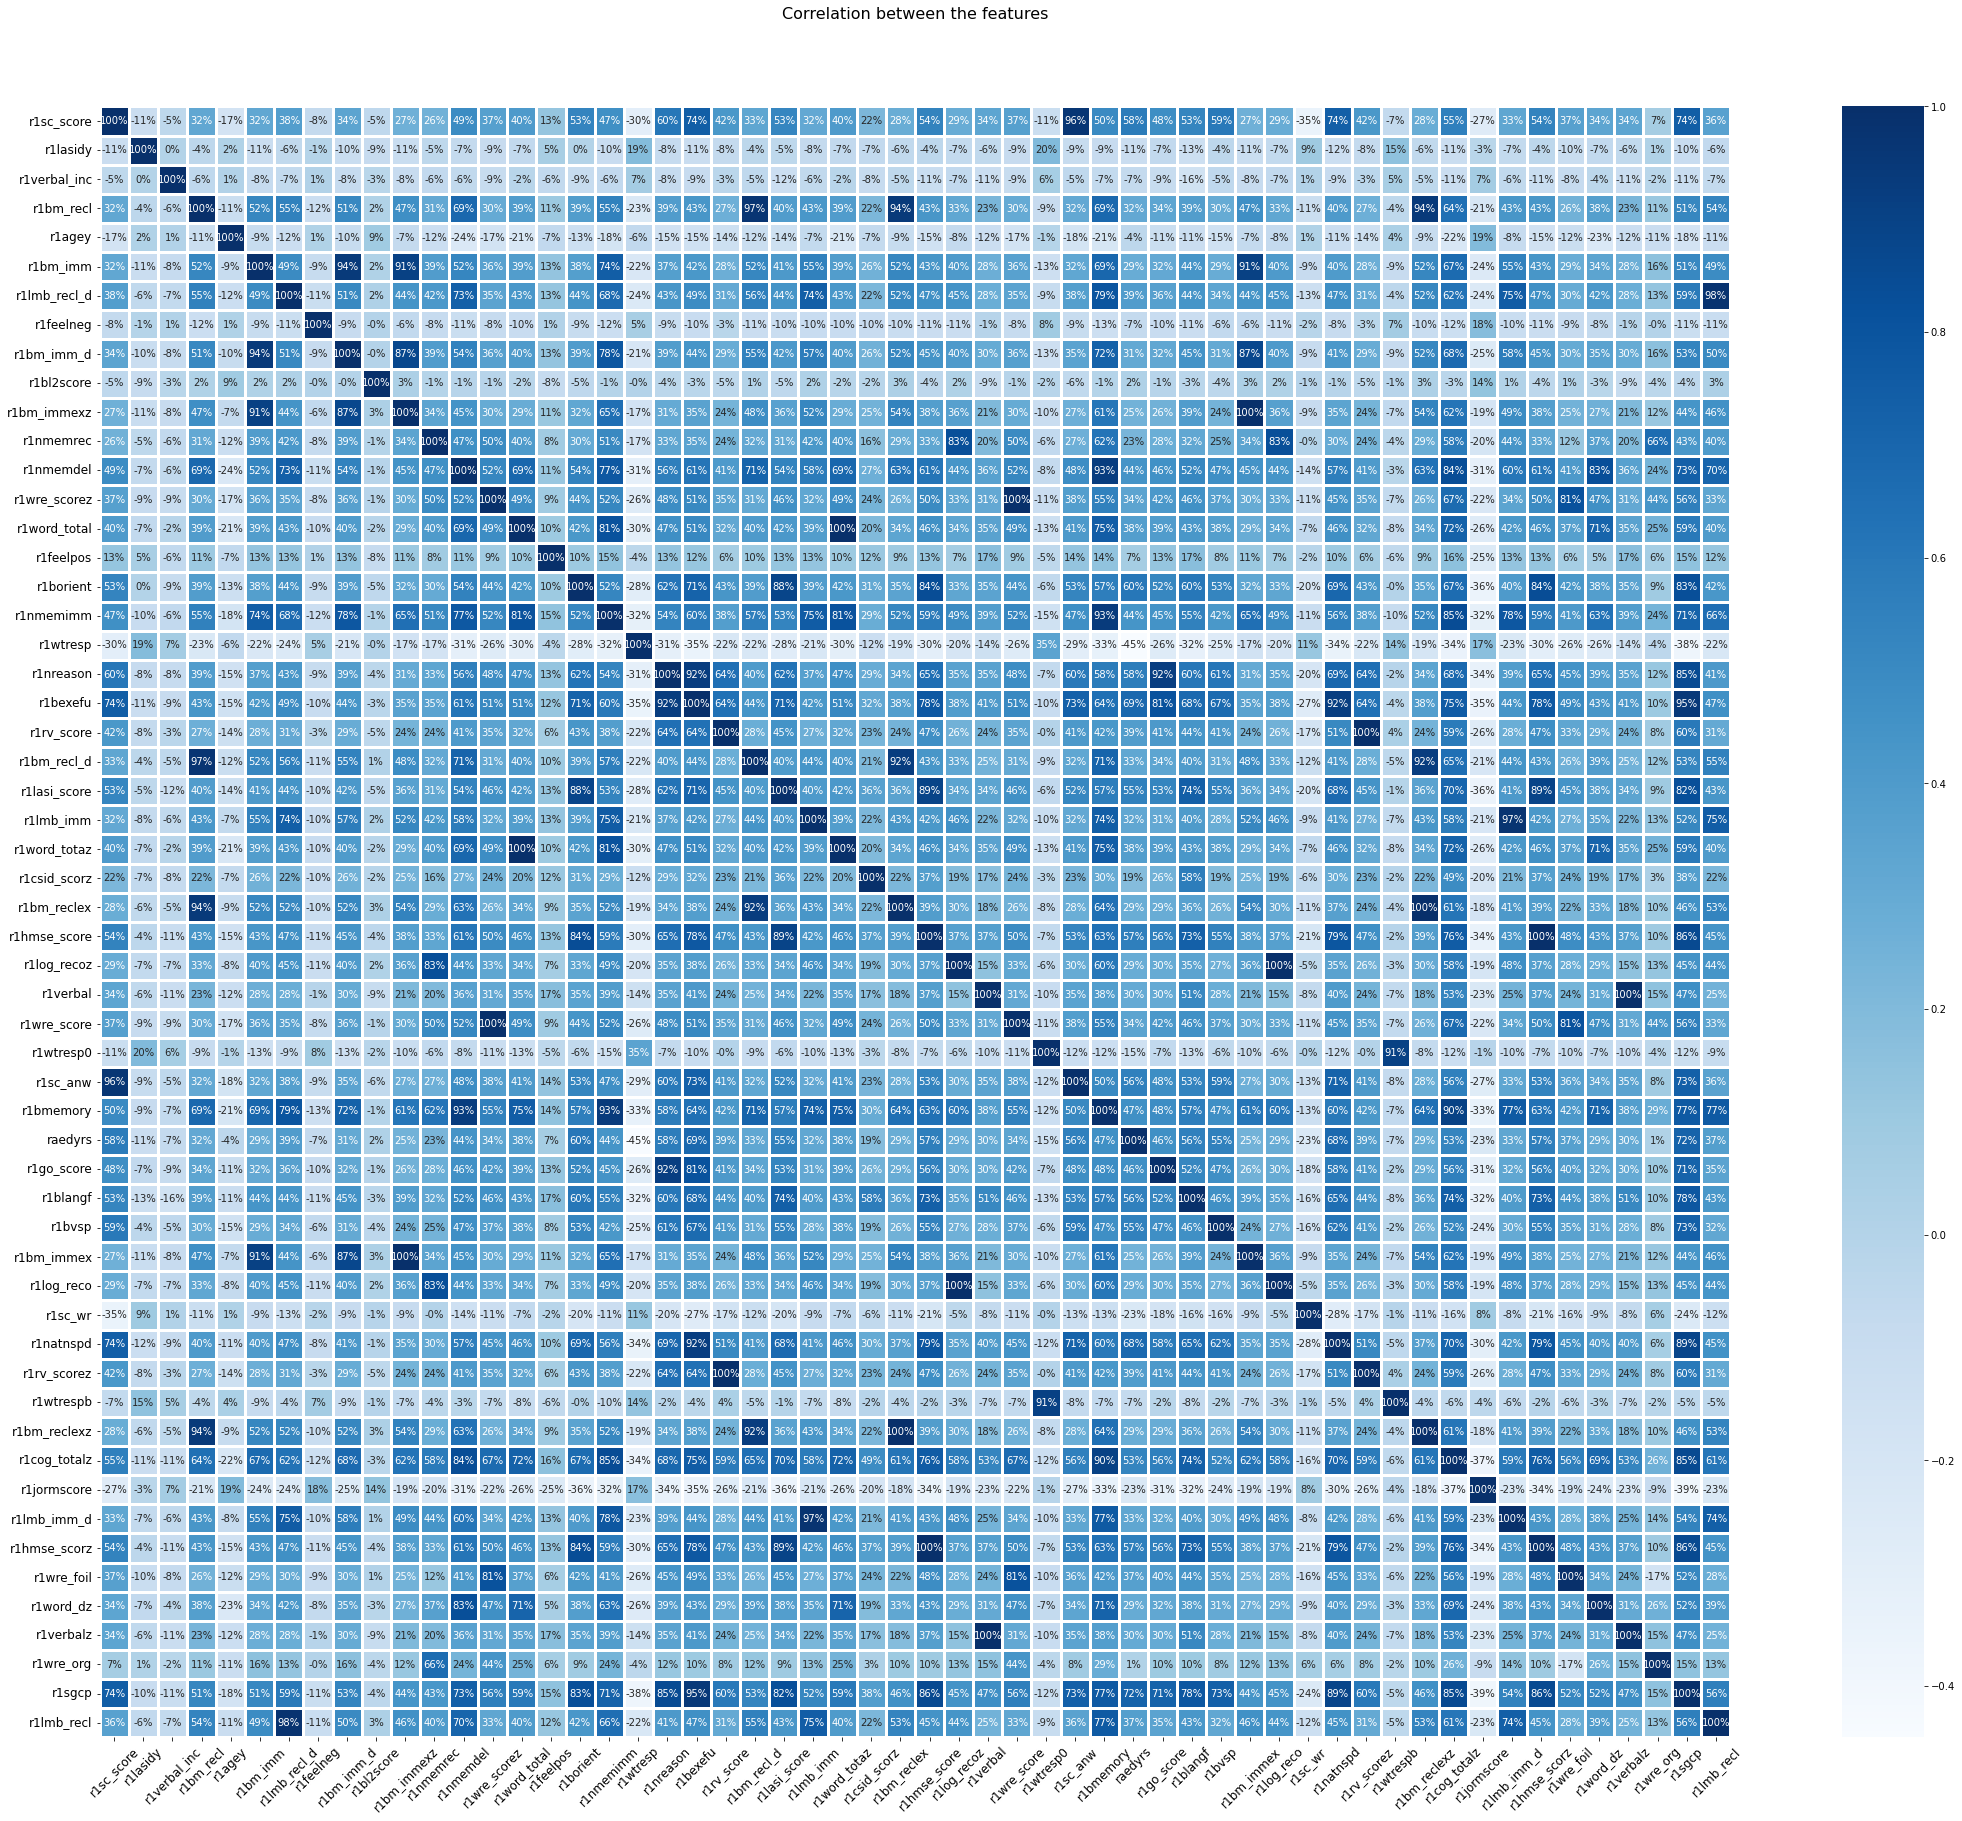

In [51]:
# Correlation between numeric variables
fig=plt.figure(figsize=(40,30))
axis=sns.heatmap(df[col_for_removing_outlier].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16, y=1.05);
axis.set_xticklabels(col_for_removing_outlier, fontsize=12, rotation = 45)
axis.set_yticklabels(col_for_removing_outlier, fontsize=12, rotation= 0);

In [57]:
# Create correlation matrix
corr_matrix = df[col_for_removing_outlier].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Droping the features 
df.drop(to_drop, axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_6500/1917548524.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


# Basic EDA (under progress)

<AxesSubplot:>

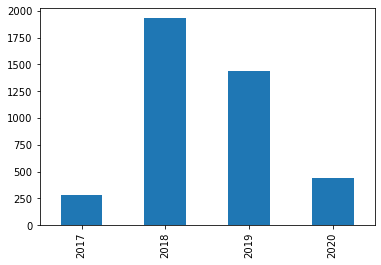

In [48]:
# Num of test each year
df['r1iwy_d'].value_counts(sort=False).plot(kind='bar')

Most of the tests where conducted in 2018 and 2019

<AxesSubplot:>

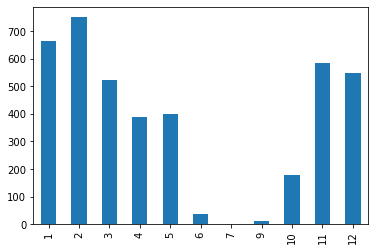

In [ ]:
# Months and num of tests
df['r1iwm_d'].value_counts(sort=False).plot(kind='bar')

There is a drop in testing for June, July and September in all four years

<AxesSubplot:xlabel='ragender', ylabel='r1agey'>

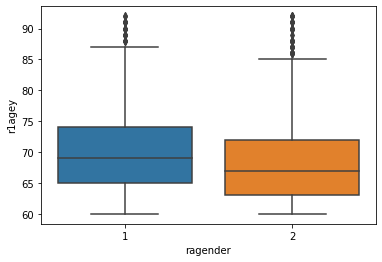

In [62]:
# Gender and Age
sns.boxplot(x='ragender', y='r1agey', data=df)

Men in this case are slighty more older than woman

In [27]:
df.columns[20:30]

Index(['r1risk', 'r1distance', 'r1location', 'r1iwstat_d', 'r1wtresp',
       'r1wtrespb', 'r1wtresp0', 'r1obsnoise', 'r1obsodor', 'r1obsair'],
      dtype='object')

<AxesSubplot:xlabel='r1risk', ylabel='r1agey'>

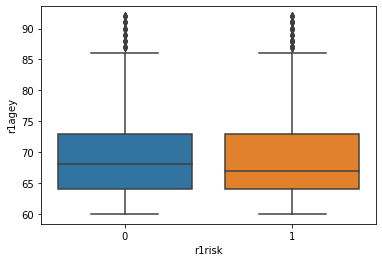

In [64]:
# Effect on age on  risk for cognitive impairment
sns.boxplot(y='r1agey', data=df, x='r1risk')

There is not effect of age on risk for cognitive impairment if the age is more than 60 years